In [2]:
import pandas as pd
from plotnine import *

/home/pmontesa/.local/lib/python3.8/site-packages/plotnine/geoms/geom_map.py:8: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).


In [29]:
MAINDIR = '/home/pmontesa/ilab/projects/AIML_CHM/DEM_CHM/development'

PNAME_LIST = [
    'WV03_20160616_104001001EBDB400_104001001E13F600',
    'WV02_20160623_10300100577C7E00_1030010058580000',
    'WV01_20130825_1020010024E78600_10200100241E6200'              
             ]

# 3 experiments:  
#     Stereopairs only: ilab/projects/AIML_CHM/DEM_CHM/development/dsm-test-v7-mae 
#     Disparity map only: ilab/projects/AIML_CHM/DEM_CHM/development/dsm-test-stereo-disparity-v1  
#     Disparity map + Stereopairs: ilab/projects/AIML_CHM/DEM_CHM/development/dsm-test-stereo-v1  

EXPERIMENT_SUBDIR_LIST = ['dsm-test-v7-mae', 'dsm-test-disparity-v1','dsm-test-stereo-disparity-v2']       
EXPERIMENT_NAME_LIST = ['stereopairs', 'disparity', 'both']  
EXPERIMENT_DIR_LIST = [ os.path.join(MAINDIR, NAME, 'results') for NAME in EXPERIMENT_SUBDIR_LIST]
EXPERIMENT_DIR_LIST

['/home/pmontesa/ilab/projects/AIML_CHM/DEM_CHM/development/dsm-test-v7-mae/results',
 '/home/pmontesa/ilab/projects/AIML_CHM/DEM_CHM/development/dsm-test-disparity-v1/results',
 '/home/pmontesa/ilab/projects/AIML_CHM/DEM_CHM/development/dsm-test-stereo-disparity-v2/results']

In [30]:
dfm = pd.concat([pd.read_csv(os.path.join(DIR, f'analyze_dsm_pred_dfm_{PNAME}_{EXPERIMENT_NAME_LIST[i]}.csv')) for i, DIR in enumerate(EXPERIMENT_DIR_LIST) for PNAME in PNAME_LIST])

In [32]:
#dfm["value"] = dfm.value.astype(float)
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33513594 entries, 0 to 3725220
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   PNAME       object 
 2   PATH        object 
 3   EXPERIMENT  object 
 4   variable    object 
 5   value       float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.7+ GB


In [33]:
experiment_remapping = {
                    'stereopairs':'Experiment 1 (stereopairs)',
                    'disparity':'Experiment 2 (disparities)',
                    'both':'Experiment 3 (combined)'
                    }
site_remapping = {
        'WV03_20160616_104001001EBDB400_104001001E13F600': 'Site 1',
        'WV02_20160623_10300100577C7E00_1030010058580000': 'Site 2',
        'WV01_20130825_1020010024E78600_10200100241E6200': 'Site 3'
                    }
dfm = dfm.assign(EXPERIMENT_NAMES = dfm.EXPERIMENT.map(rename_mapping))
dfm = dfm.assign(SITE_NAME = dfm.PNAME.map(site_remapping))

/home/pmontesa/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
/home/pmontesa/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
/home/pmontesa/.local/lib/python3.8/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 1809121 rows containing non-finite values.


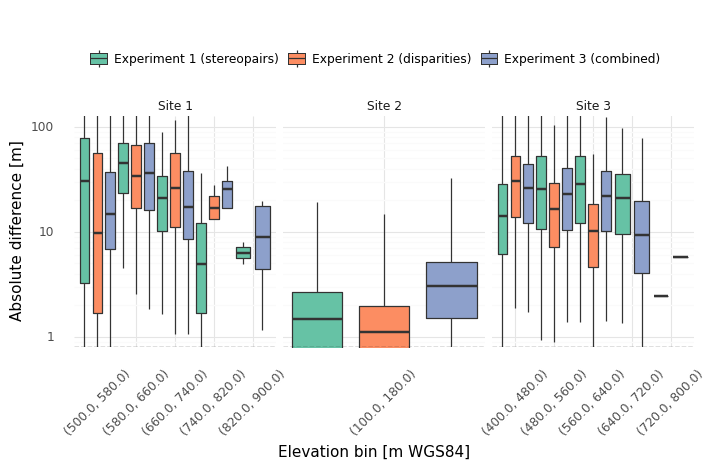

<ggplot: (1405840599893)>

In [34]:
(
    ggplot(dfm.sample(frac=0.1), aes(y='value', x='variable', fill='EXPERIMENT_NAMES'))
            #+ geom_violin()
            + geom_boxplot(outlier_shape='', alpha=1, 
                           #fill='gray', 
                           position=position_dodge(1))
            + geom_hline(yintercept=0, linetype = 'dashed')
            + scale_fill_brewer(type="qual", palette=7, name=' ')
            #+ scale_y_continuous(limits=(-10,10))
            #+ coord_cartesian(ylim = (-50,50))
            + facet_wrap('~SITE_NAME', scales='free_x')
            + labs(y='Absolute difference [m]', x='Elevation bin [m WGS84]')
            + theme_minimal()
            + scale_y_log10()
            + coord_cartesian(ylim = (0.0001,2))
            + theme(figure_size=(8,3), legend_position = 'top', 
                    #legend_text_position = 'bottom', 
                    axis_text_x = element_text(angle = 45))
            
)

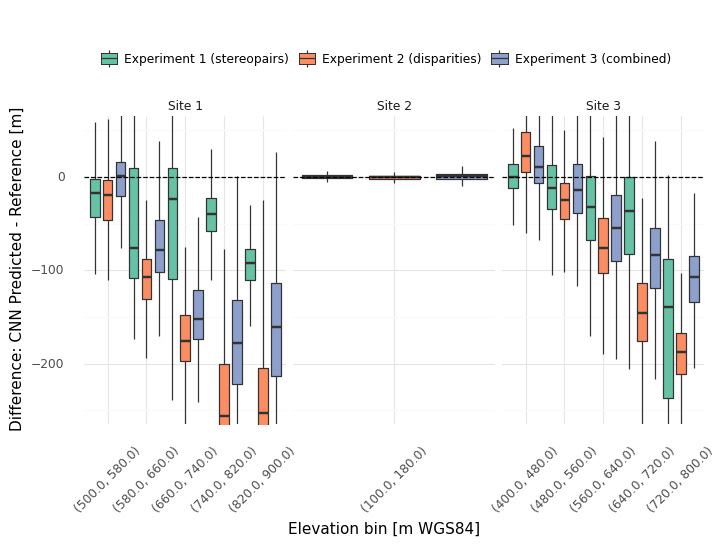

<ggplot: (1405841661004)>

In [35]:
(
    ggplot(dfm.sample(frac=0.1), aes(y='value', x='variable', fill='EXPERIMENT_NAMES'))
            #+ geom_violin()
            + geom_boxplot(outlier_shape='', alpha=1, 
                           #fill='gray', 
                           position=position_dodge(1))
            + geom_hline(yintercept=0, linetype = 'dashed')
            + scale_fill_brewer(type="qual", palette=7, name=' ')
            + coord_cartesian(ylim = (-250,50))
            + facet_wrap('~SITE_NAME', scales='free_x')
            + labs(y='Difference: CNN Predicted - Reference [m]', x='Elevation bin [m WGS84]')
            + theme_minimal()
            + theme(figure_size=(8,4), legend_position = 'top', 
                    #legend_text_position = 'bottom', 
                    axis_text_x = element_text(angle = 45))
            
)

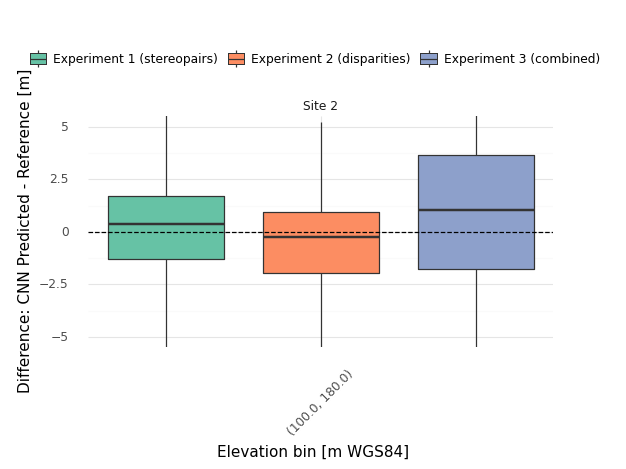

<ggplot: (1405841577265)>

In [41]:
(
    ggplot(dfm[dfm.SITE_NAME == 'Site 2'], aes(y='value', x='variable', fill='EXPERIMENT_NAMES'))
            #+ geom_violin()
            + geom_boxplot(outlier_shape='', alpha=1, 
                           #fill='gray', 
                           position=position_dodge(1))
            + geom_hline(yintercept=0, linetype = 'dashed')
            + scale_fill_brewer(type="qual", palette=7, name=' ')
            + coord_cartesian(ylim = (-5,5))
            + facet_wrap('~SITE_NAME', scales='free_x')
            + labs(y='Difference: CNN Predicted - Reference [m]', x='Elevation bin [m WGS84]')
            + theme_minimal()
            + theme(figure_size=(6,3), legend_position = 'top', 
                    #legend_text_position = 'bottom', 
                    axis_text_x = element_text(angle = 45))
            
)